In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings 
from scipy import stats
warnings.filterwarnings('ignore')

In [311]:
train=pd.read_csv('Final_Train.csv')
test=pd.read_csv('Final_Test.csv')

In [312]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [313]:
train.tail()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100
5960,"BDS, MDS - Orthodontics",17 years experience,100%,"Pitampura, Delhi",Dentist,Acrylic Partial Denture Crowns and Bridges Fix...,200


In [314]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [315]:
train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [316]:
# We are separating 'Area' and 'City' from 'Place' column for more clear information.

train['Area']=train['Place'].str.rsplit(',',1).str.get(0)
train['City']=train['Place'].str.rsplit(',',1).str.get(1)
test['Area']=test['Place'].str.rsplit(',',1).str.get(0)
test['City']=test['Place'].str.split(',',1).str.get(1)

train['City']=train['City'].str.strip()
test['City']=test['City'].str.strip()

In [317]:
train['Area'].isnull().sum(),test['Area'].isnull().sum(),train['City'].isnull().sum(),test['City'].isnull().sum()

(25, 6, 26, 6)

In [318]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Area,City
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Kakkanad,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Whitefield,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Mathikere - BEL,Bangalore
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250,Bannerghatta Road,Bangalore
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Keelkattalai,Chennai


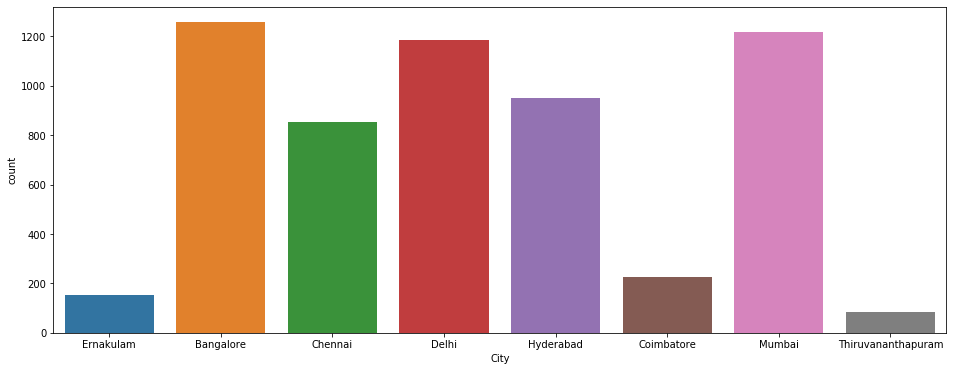

In [319]:
plt.figure(figsize=(16, 6))
sns.countplot(train['City'])

# We can observe that majority pf doctors are from 'Bangalore','Delhi' and 'Mumbai'.

In [320]:
train['Qualification'].value_counts()

BDS                                                                                                                        488
BHMS                                                                                                                       477
BAMS                                                                                                                       471
MBBS                                                                                                                       334
MBBS, MS - ENT                                                                                                             220
                                                                                                                          ... 
MBBS, Fellowship in Diabetology, Certification Course In Diabetes, Fellowship in Clinical Cardiology, PG in Diabetology      1
BHMS, MD - Homeopathy, Diploma in Hospital Administration                                                      

In [321]:
def doc(series):
    text = ''
    for i in series:
        text += i + ','
    return text

In [322]:
text = doc(train.Qualification)
df1 = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df1.columns=['Qualification','Count']
df1.head(20)

,Qualification,Count
0,MBBS,2448
1,BDS,1208
2,BAMS,711
3,BHMS,706
4,MBBS,360
5,MS - ENT,340
6,Venereology & Leprosy,297
7,MD - Dermatology,271
8,MD - General Medicine,259
9,Diploma in Otorhinolaryngology (DLO),235


In [323]:
text = doc(test.Qualification)
df2 = pd.DataFrame.from_dict(dict(Counter(text.split(',')).most_common()), orient='index').reset_index()
df2.columns=['Qualification','Count']
df2.head(20)

,Qualification,Count
0,MBBS,865
1,BDS,371
2,BHMS,232
3,BAMS,228
4,MBBS,115
5,MS - ENT,107
6,MD - Dermatology,104
7,Venereology & Leprosy,91
8,MD - General Medicine,84
9,Diploma in Otorhinolaryngology (DLO),79


# We can see that there are more no. of doctors having qualification of 'MBBS','BDS','BAMS' and 'BHMS'.

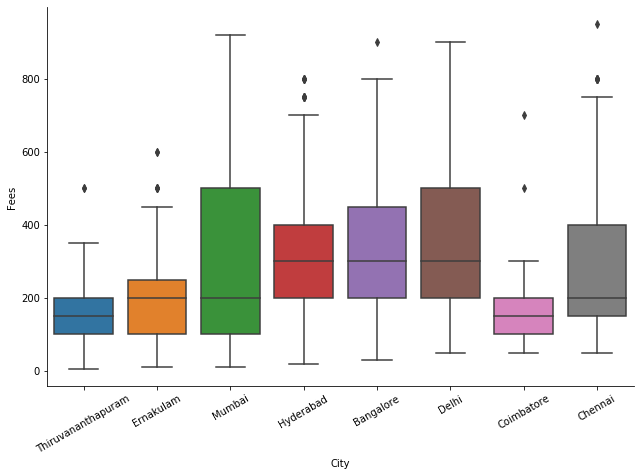

In [324]:
sns.catplot(x='City',y='Fees', data=train.sort_values("Fees"),kind='box',height=6,aspect= 1.5)
plt.xticks(rotation=30)
plt.show()

# Filtering and Converting data

In [325]:
train.drop('Miscellaneous_Info',axis=1,inplace=True)
test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [326]:
def changequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [327]:
train['Qualification']=train['Qualification'].apply(changequali)
test['Qualification']=test['Qualification'].apply(changequali)

In [328]:
def removeminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [329]:
train['Qualification']=train['Qualification'].apply(removeminus)
test['Qualification']=test['Qualification'].apply(removeminus)

In [330]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [331]:
train['Qualification']=train['Qualification'].apply(stillqua)
test['Qualification']=test['Qualification'].apply(stillqua)

In [332]:
train['Qualification'].value_counts()

MBBS                             2448
BDS                              1208
BAMS                              711
BHMS                              706
MD                                264
                                 ... 
FNB                                 1
Post MD SR AIIMS                    1
POST GRADUATE IN HOMOEOPATHY        1
BIMS                                1
Training in Facial Aesthetics       1
Name: Qualification, Length: 73, dtype: int64

In [333]:
def changeexperience(x):
    bans=x.split(' ')
    return bans[0]

In [334]:
train['Experience']=train['Experience'].apply(changeexperience)
test['Experience']=test['Experience'].apply(changeexperience)

In [335]:
train['Experience']=train['Experience'].astype(int)
test['Experience']=test['Experience'].astype(int)

In [336]:
caps=train[train['Rating'].notnull()]
caps.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100,Kakkanad,Ernakulam
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350,Whitefield,Bangalore
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250,Keelkattalai,Chennai
7,BDS,10,99%,"Arekere, Bangalore",Dentist,200,Arekere,Bangalore
12,BDS,9,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200,Coimbatore Racecourse,Coimbatore


In [337]:
def removepercent(x):
    vans=x.split('%')
    return vans[0]

In [338]:
caps['Rating']=caps['Rating'].apply(removepercent)
caps['Rating']=caps['Rating'].astype(int)

In [339]:
train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [340]:
caps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

In [341]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '94%'
        elif Profile=='ENT Specialist':
            return '89%'
        elif Profile=='General Medicine':
            return '92%'
        elif Profile=='Homeopath':
            return '97%'
    else:
        return Rating

In [342]:
train['Rating']=train[['Rating','Profile']].apply(fillratings,axis=1)

In [343]:
baps=test[test['Rating'].notnull()]

In [344]:
baps['Rating']=baps['Rating'].apply(removepercent)

In [345]:
test['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [346]:
baps['Rating']=baps['Rating'].astype(int)

In [347]:
baps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [348]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '93%'
        elif Profile=='ENT Specialist':
            return '88%'
        elif Profile=='General Medicine':
            return '93%'
        elif Profile=='Homeopath':
            return '96%'
    else:
        return Rating

In [349]:
test['Rating']=test[['Rating','Profile']].apply(testfillratings,axis=1)

In [350]:
train['Rating']=train['Rating'].apply(removepercent)
test['Rating']=test['Rating'].apply(removepercent)

In [351]:
train['Rating']=train['Rating'].astype(int)
test['Rating']=test['Rating'].astype(int)

In [352]:
taps=train[train['Place'].notnull()]

In [353]:
taps['Place']=taps['Place'].apply(Placeexactly)
taps['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [354]:
taps[taps['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
3980,BDS,23,98,e,Dentist,250,e,NaN


In [355]:
def Placeexactly(x):
    wans=str(x).split(' ')
    return wans[-1]

In [356]:
train['Place'].fillna('Malleswaram, Bangalore',inplace=True)
train['Place']=train['Place'].apply(Placeexactly)

In [357]:
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [358]:
train['Place']=train['Place'].apply(removethee)

In [359]:
fraps=test[test['Place'].notnull()]

In [360]:
fraps['Place']=fraps['Place'].apply(Placeexactly)

In [361]:
fraps['Place'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [362]:
test['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [363]:
test['Place']=test['Place'].apply(Placeexactly)

In [364]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         5961 non-null   int32 
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
 6   Area           5936 non-null   object
 7   City           5935 non-null   object
dtypes: int32(2), int64(1), object(5)
memory usage: 326.1+ KB


In [365]:
train.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City
0,BHMS,24,100,Ernakulam,Homeopath,100,Kakkanad,Ernakulam
1,BAMS,12,98,Bangalore,Ayurveda,350,Whitefield,Bangalore
2,MBBS,9,89,Bangalore,ENT Specialist,300,Mathikere - BEL,Bangalore
3,BSC,12,96,Bangalore,Ayurveda,250,Bannerghatta Road,Bangalore
4,BAMS,20,100,Chennai,Ayurveda,250,Keelkattalai,Chennai


In [366]:
train.groupby('Place')['Fees'].mean()

Place
Bangalore             324.364486
Chennai               283.602339
Coimbatore            154.298246
Delhi                 362.911392
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [367]:
def crat(x):
    if x<=50: 
        return 1 
    if x>50:
        return 2

In [368]:
train['Rating']=train['Rating'].apply(crat)
test['Rating']=test['Rating'].apply(crat)

In [369]:
train.groupby('Rating')['Fees'].mean()

Rating
1    562.500000
2    307.602553
Name: Fees, dtype: float64

In [370]:
train['Rating'].value_counts(normalize=True)

2    0.998658
1    0.001342
Name: Rating, dtype: float64

In [371]:
def exper(x):
    if x<=33:
        return 1
    if x>33:
        return 2

In [372]:
train['Experience']=train['Experience'].apply(exper)
test['Experience']=test['Experience'].apply(exper)

In [373]:
train.groupby('Experience')['Fees'].mean()

Experience
1    312.954683
2    268.045113
Name: Fees, dtype: float64

In [374]:
train['Experience'].value_counts(normalize=True)

1    0.888442
2    0.111558
Name: Experience, dtype: float64

In [375]:
place=train.groupby('Place')['Fees'].mean()

In [376]:
train['Place']=train['Place'].map(place)
test['Place']=test['Place'].map(place)

In [377]:
profile=train.groupby('Profile')['Fees'].mean()

In [378]:
train['Profile']=train['Profile'].map(profile)
test['Profile']=test['Profile'].map(profile)

In [379]:
qualification=train.groupby('Qualification')['Fees'].mean()

In [380]:
train['Qualification']=train['Qualification'].map(qualification)
test['Qualification']=test['Qualification'].map(qualification)

In [381]:
train['Fees']=np.log(train['Fees'])

In [382]:
train=train.drop('Area', axis=1)
train=train.drop('City', axis=1)

In [383]:
test=test.drop('Area', axis=1)
test=test.drop('City', axis=1)

In [384]:
X=train.drop('Fees',axis=1)
y=train['Fees']

In [385]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [386]:
import lightgbm as lgb
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'eval_metric': 'rmsle',
    'max_depth': 7, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 30}
n_estimators = 700

In [387]:
d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_test, label=y_test)

In [388]:
watchlist = [d_valid]

In [389]:
model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.440246
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.427177
[3]	valid_0's l2: 0.416708
[4]	valid_0's l2: 0.408357
[5]	valid_0's l2: 0.401524
[6]	valid_0's l2: 0.396379
[7

In [390]:
preds = model.predict(test)
preds = np.exp(preds)

In [391]:
Doctor=pd.DataFrame()

In [392]:
Doctor['Fees']=preds

In [393]:
Doctor.to_csv('doctor fee.csv ',index=False)